In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Исторические данные об алфабетизации:
# - conjsign1686 , conjsign1786 , conjsign1816 и т.д. - количество людей, умеющих подписываться (sign = signature) в определенном году
# - conjnosi1686 , conjnosi1786 , conjnosi1816 и т.д. - количество людей, не умеющих подписываться (nosi = no signature) в определенном году
# 3. Процентные показатели:
# - palpha1816 , palpha1866 , и т.д. - абсолютное количество грамотных людей в определенном году
# - peralpha1816 , peralpha1866 , и т.д. - процент грамотных людей в определенном году (per = percentage)

In [3]:
alpha_df = pd.read_csv('../Data/Alphabetisation/alphabetisationcommunes.csv', encoding='utf-8')

In [4]:
print("Информация о датасете:")
print(alpha_df.info())
print("\nПервые несколько строк:")
print(alpha_df.head())

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37676 entries, 0 to 37675
Columns: 388 entries, dep to peralpha1946
dtypes: float64(222), int64(162), object(4)
memory usage: 111.5+ MB
None

Первые несколько строк:
  dep codecommune       nomdep   nomcommune  conjsign1686  conjnosi1686  \
0  2B       2B110  HAUTE-CORSE    FAVALELLO          0.01          0.37   
1  2B       2B179  HAUTE-CORSE       NOVALE          0.05          1.41   
2  2B       2B214  HAUTE-CORSE        PIANO          0.02          0.49   
3  2B       2B005  HAUTE-CORSE       ALANDO          0.02          0.48   
4  2B       2B151  HAUTE-CORSE  LUNGHIGNANO          0.01          0.17   

   conjsign1786  conjnosi1786  conjsign1816  conjnosi1816  ...  palpha1942  \
0          0.04          0.57          0.06          0.71  ...    0.315789   
1          0.14          2.20          0.22          2.69  ...    0.294118   
2          0.05          0.77          0.08          0.95  ...    0.300000  

In [5]:
# Статистическое описание
print("\nСтатистическое описание:")
print(alpha_df.describe())


Статистическое описание:
       conjsign1686  conjnosi1686  conjsign1786  conjnosi1786  conjsign1816  \
count  37676.000000  37676.000000  37676.000000  37676.000000  37676.000000   
mean       1.727542      5.842182      3.859357      6.687686      5.381066   
std       11.787793     12.613672     21.758138     14.071124     28.591900   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.160000      1.810000      0.430000      1.880000      0.660000   
50%        0.410000      3.470000      1.010000      4.010000      1.500000   
75%        1.140000      6.530000      2.720000      7.902500      4.010000   
max      878.349980    870.380000   1393.000000   1092.710000   1577.550000   

       conjnosi1816  conjsign1854  conjnosi1854  conjsign1856  conjnosi1856  \
count  37676.000000  37676.000000  37676.000000  37676.000000  37676.000000   
mean       6.963519      9.070497      5.935266      9.828068      6.123063   
std       14.002370     5

In [6]:
print("\nПропущенные значения:")
print(alpha_df.isnull().sum())


Пропущенные значения:
dep             0
codecommune     0
nomdep          0
nomcommune      0
conjsign1686    0
               ..
peralpha1944    0
palpha1945      0
peralpha1945    0
palpha1946      0
peralpha1946    0
Length: 388, dtype: int64


Columns related to alphabetisation:
['alpha1866', 'alpha1867', 'alpha1868', 'alpha1869', 'alpha1870', 'alpha1871', 'alpha1872', 'alpha1873', 'alpha1874', 'alpha1875', 'alpha1876', 'alpha1877', 'alpha1878', 'alpha1879', 'alpha1880', 'alpha1881', 'alpha1882', 'alpha1883', 'alpha1884', 'alpha1885', 'alpha1886', 'alpha1887', 'alpha1888', 'alpha1889', 'alpha1890', 'alpha1891', 'alpha1892', 'alpha1893', 'alpha1894', 'alpha1895', 'alpha1896', 'alpha1897', 'alpha1898', 'alpha1899', 'alpha1900', 'alpha1901', 'alpha1902', 'alpha1903', 'alpha1904', 'alpha1905', 'alpha1906', 'alpha1907', 'alpha1908', 'alpha1909', 'alpha1910', 'alpha1911', 'alpha1912', 'alpha1913', 'alpha1914', 'alpha1915', 'alpha1916', 'alpha1917', 'alpha1918', 'alpha1919', 'alpha1920', 'alpha1921', 'alpha1922', 'alpha1923', 'alpha1924', 'alpha1925', 'alpha1926', 'alpha1927', 'alpha1928', 'alpha1929', 'alpha1930', 'alpha1931', 'alpha1932', 'alpha1933', 'alpha1934', 'alpha1935', 'alpha1936', 'alpha1937', 'alpha1938', 'alpha1939', '

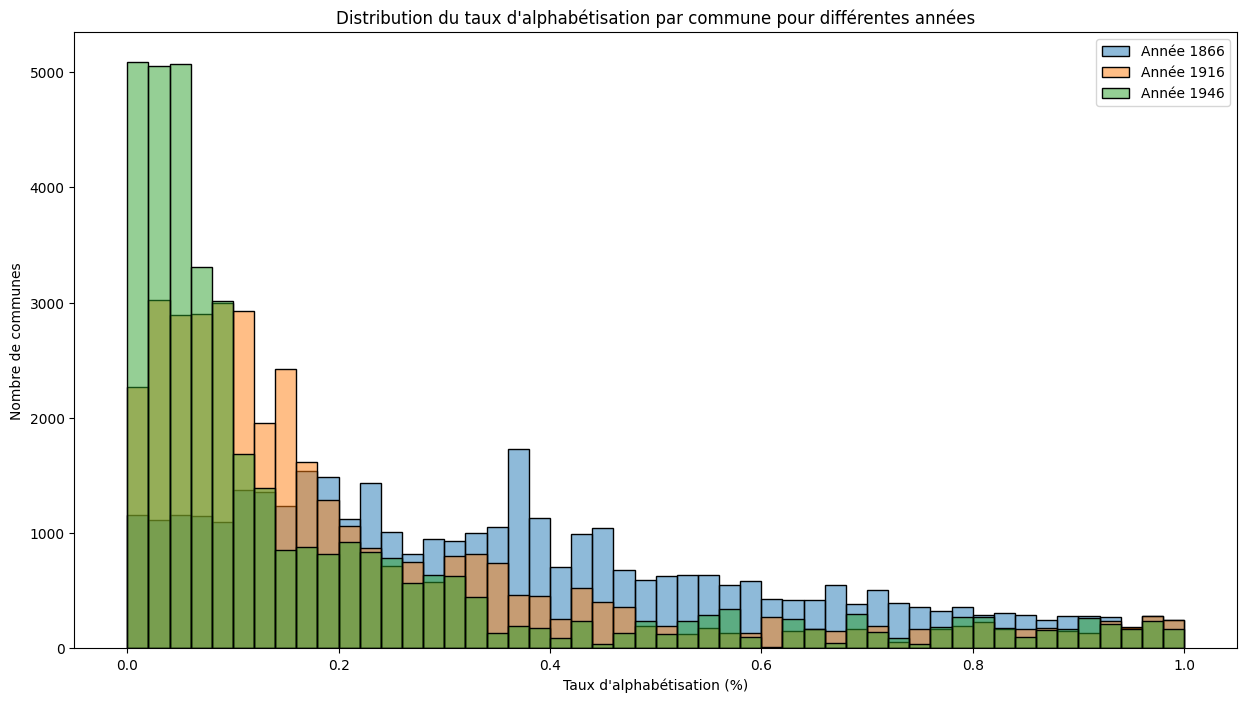

In [10]:
# Выведем все колонки, содержащие "alpha"
alpha_columns = [col for col in alpha_df.columns if 'alpha' in col]
print("Columns related to alphabetisation:")
print(alpha_columns)

# После того как увидим точные названия, исправим код визуализации
plt.figure(figsize=(15, 8))

# Выберем несколько периодов для сравнения (скорректируем после просмотра реальных названий колонок)
years = ['1816', '1866', '1916', '1946']
for year in years:
    column_name = f'peralpha{year}'  # используем 'peralpha' вместо 'palpha'
    if column_name in alpha_df.columns:
        sns.histplot(data=alpha_df, x=column_name, bins=50, alpha=0.5, label=f'Année {year}')

plt.title('Distribution du taux d\'alphabétisation par commune pour différentes années')
plt.xlabel('Taux d\'alphabétisation (%)')
plt.ylabel('Nombre de communes')
plt.legend()
plt.show()